# Using dask or indices for SMOC data

In this notebook we compare the effects of passing indices or chunksizes for different sized `ParticleSets`.

* [Only chunksizes](#Chunksize-argument)
* [Parcels versions](#Parcels-versions)
* [Runtime](#Runtime)
* [Number of particles](#Number-of-particles)

In [1]:
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import xarray as xr
import cartopy.crs as ccrs
from os import path

In [2]:
p_versions = ['2.2.1','2.2.2']
runtime = [timedelta(days=2),timedelta(days=10),timedelta(days=30)]
runtime_float = [2, 10, 30]

n_particles = np.load(f'n_particles_v{p_versions[0]}.npy', allow_pickle=True)
chunksizes = np.load(f'chunksizes_v{p_versions[0]}.npy', allow_pickle=True)

time = np.zeros((len(p_versions),len(runtime),len(chunksizes),len(n_particles)))
mem = np.zeros((len(p_versions),len(runtime),len(chunksizes),len(n_particles)))
chunks = np.zeros((len(p_versions),len(runtime),len(chunksizes),len(n_particles)))

for i,v in enumerate(p_versions):
    for j, rt in enumerate(runtime):
        time[i,j] = np.load(f'execute_time_v{v}_{rt.days}d.npy', allow_pickle=True)
        mem[i,j] = np.load(f'execute_mem_v{v}_{rt.days}d.npy', allow_pickle=True)
#         chunks[i,j] = np.load(f'execute_chunks_v{v}_{rt.days}d.npy', allow_pickle=True)

In [3]:
### Colormap for Parcels versions
pversion_clist = ['#F3965E','#24A793','#001240']
pversion_cmap = ListedColormap(pversion_clist)

### Colormap for different runtimes
runtime_clist = ['#AA1555','#5287C6','#FFE6AB']
runtime_cmap = ListedColormap(runtime_clist)

### Colormap for different numbers of particles
nparticles_clist = ['#FFCD00','#C00A35','#5B2182']
nparticles_cmap = ListedColormap(nparticles_clist)

### Colormap for different chunksizes
cs_clist = ['#FFCD00','#F3965E','#5287C6','#AA1555','#5B2182']
cs_cmap = ListedColormap(cs_clist)

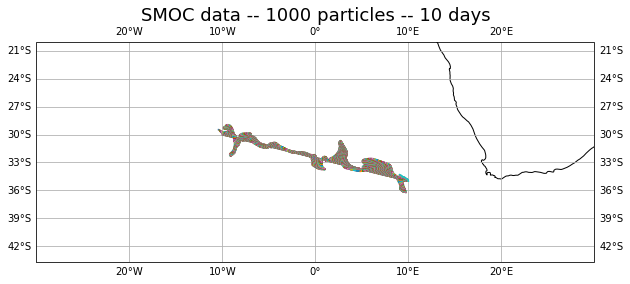

In [4]:
ds = xr.open_dataset('chunking_2.2.2_10d.nc')

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_title('SMOC data -- 1000 particles -- 10 days', fontsize=18)
ax.coastlines()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax.plot(ds['lon'].T,ds['lat'].T)
ax.set_extent([-30, 30, -40, -20])
plt.show()

## Chunksize argument

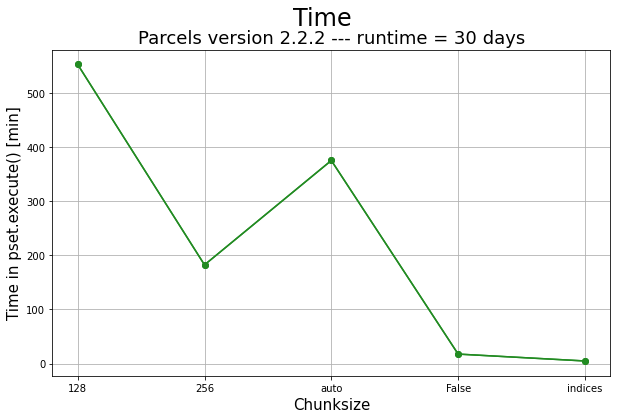

In [5]:
v=1
rt =2
fig= plt.figure(figsize = (10,6))
fig.suptitle('Time',fontsize=24)
ax = plt.axes()

ax.set_title(f'Parcels version {p_versions[v]} --- runtime = {runtime[rt].days} days', fontsize=18)

ax.plot(time[v,rt]/60, marker='o',c='forestgreen')
ax.grid()

ax.set_xticks(np.arange(0,len(chunksizes)))
ax.set_xticklabels(chunksizes)
ax.set_xlabel('Chunksize', fontsize=15)
ax.set_ylabel('Time in pset.execute() [min]', fontsize= 15)
plt.show()

## Parcels versions

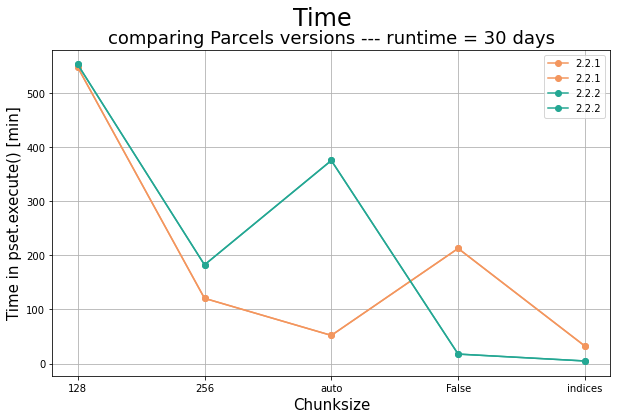

In [6]:
rt=2
fig= plt.figure(figsize = (10,6))
ax = plt.axes()

fig.suptitle('Time',fontsize=24)
ax.set_title(f'comparing Parcels versions --- runtime = {runtime[rt].days} days', fontsize=18)

for i, v in enumerate(p_versions):
    ax.plot(time[i,rt].reshape(len(chunksizes),len(n_particles))/60, marker='o',c=pversion_cmap(i), label=f'{v}')
ax.grid()

ax.set_xticks(np.arange(0,len(chunksizes)))
ax.set_xticklabels(chunksizes)
ax.set_xlabel('Chunksize', fontsize=15)
ax.set_ylabel('Time in pset.execute() [min]', fontsize= 15)
ax.legend()

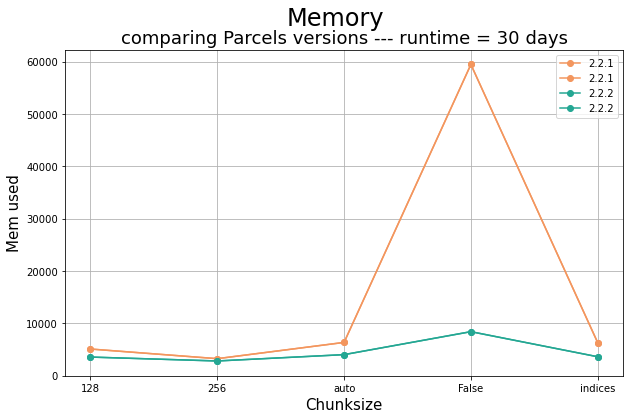

In [7]:
rt=2
fig= plt.figure(figsize = (10,6))
ax = plt.axes()

fig.suptitle('Memory',fontsize=24)
ax.set_title(f'comparing Parcels versions --- runtime = {runtime[rt].days} days', fontsize=18)

for i, v in enumerate(p_versions):
    ax.plot(mem[i,rt].reshape(len(chunksizes),len(n_particles)), marker='o',c=pversion_cmap(i), label=f'{v}')
ax.grid()

ax.set_xticks(np.arange(0,len(chunksizes)))
ax.set_xticklabels(chunksizes)
ax.set_xlabel('Chunksize', fontsize=15)
ax.set_ylabel('Mem used', fontsize= 15)
ax.legend()
plt.show()

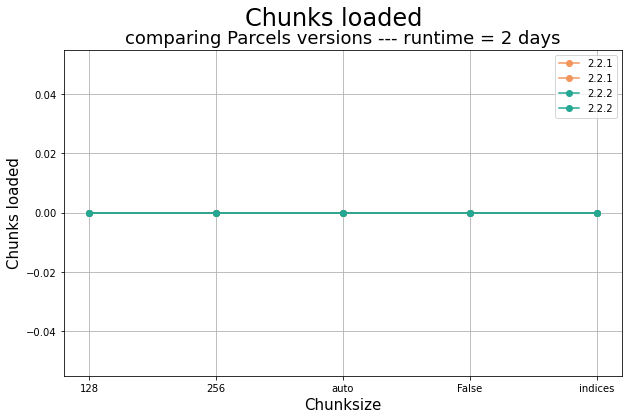

In [8]:
rt=0
fig= plt.figure(figsize = (10,6))
ax = plt.axes()

fig.suptitle('Chunks loaded',fontsize=24)
ax.set_title(f'comparing Parcels versions --- runtime = {runtime[rt].days} days', fontsize=18)

for i, v in enumerate(p_versions):
    ax.plot(chunks[i,rt].reshape(len(chunksizes),len(n_particles)), marker='o',c=pversion_cmap(i), label=f'{v}')
ax.grid()

ax.set_xticks(np.arange(0,len(chunksizes)))
ax.set_xticklabels(chunksizes)
ax.set_xlabel('Chunksize', fontsize=15)
ax.set_ylabel('Chunks loaded', fontsize= 15)
ax.legend()
plt.show()

## Runtime

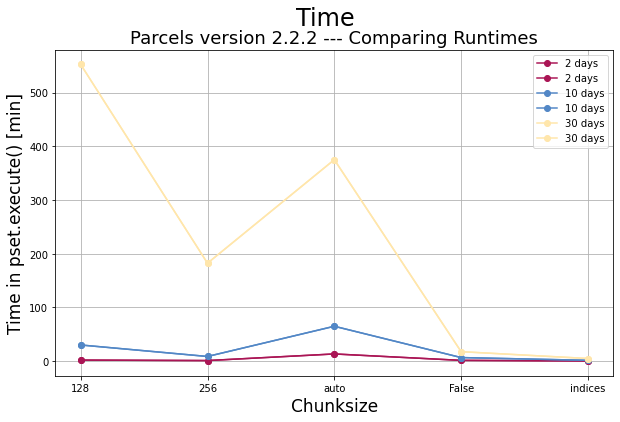

In [9]:
v=1
fig= plt.figure(figsize = (10,6))
ax = plt.axes()

fig.suptitle('Time',fontsize=24)
ax.set_title(f'Parcels version {p_versions[v]} --- Comparing Runtimes', fontsize=18)

for i, rt in enumerate(runtime):
    ax.plot(time[v,i].reshape(len(chunksizes),len(n_particles))/60, marker='o',c=runtime_cmap(i), label=f'{rt.days} days')
ax.grid()

ax.set_xticks(np.arange(0,len(chunksizes)))
ax.set_xticklabels(chunksizes)
ax.set_xlabel('Chunksize', fontsize=17)
ax.set_ylabel('Time in pset.execute() [min]', fontsize= 17)
ax.legend()

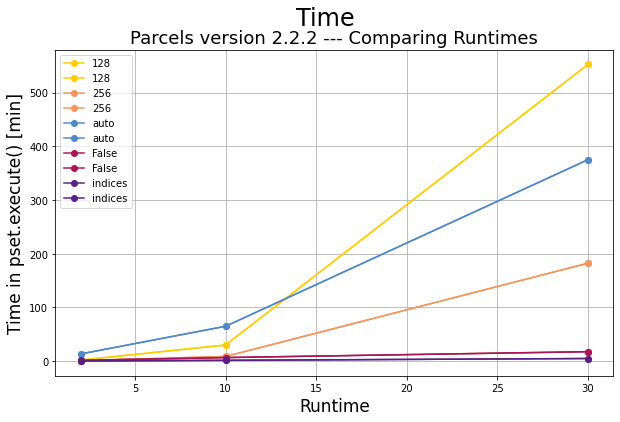

In [10]:
runtimes = np.tile(runtime_float,(len(n_particles),1)).T

v=1
fig= plt.figure(figsize = (10,6))
ax = plt.axes()

fig.suptitle('Time',fontsize=24)
ax.set_title(f'Parcels version {p_versions[v]} --- Comparing Runtimes', fontsize=18)

for i, cs in enumerate(chunksizes):
    ax.plot(runtimes,time[v,:,i].reshape(len(runtime),len(n_particles))/60, marker='o',c=cs_cmap(i), label=f'{cs}')
ax.grid()

ax.set_xlabel('Runtime', fontsize=17)
ax.set_ylabel('Time in pset.execute() [min]', fontsize= 17)
ax.legend()

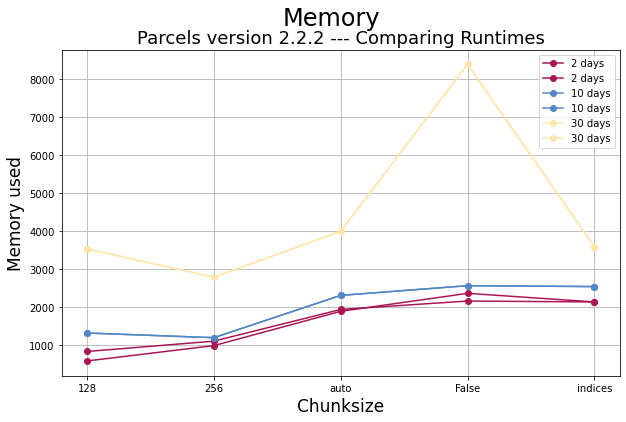

In [11]:
v=1
fig= plt.figure(figsize = (10,6))
ax = plt.axes()

fig.suptitle('Memory',fontsize=24)
ax.set_title(f'Parcels version {p_versions[v]} --- Comparing Runtimes', fontsize=18)

for i, rt in enumerate(runtime):
    ax.plot(mem[v,i].reshape(len(chunksizes),len(n_particles)), marker='o',c=runtime_cmap(i), label=f'{rt.days} days')
ax.grid()

ax.set_xticks(np.arange(0,len(chunksizes)))
ax.set_xticklabels(chunksizes)
ax.set_xlabel('Chunksize', fontsize=17)
ax.set_ylabel('Memory used', fontsize= 17)
ax.legend()

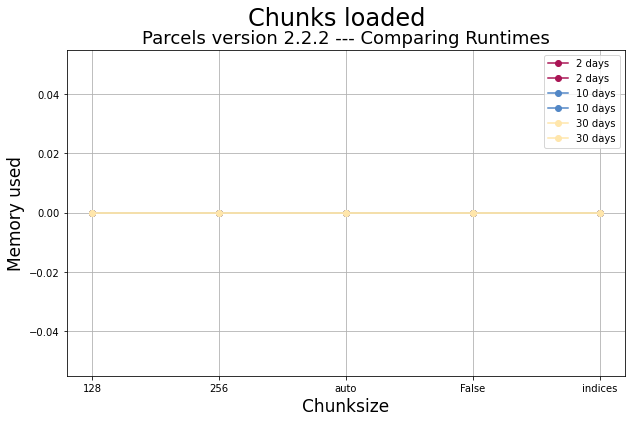

In [12]:
v=1
fig= plt.figure(figsize = (10,6))
ax = plt.axes()

fig.suptitle('Chunks loaded',fontsize=24)
ax.set_title(f'Parcels version {p_versions[v]} --- Comparing Runtimes', fontsize=18)

for i, rt in enumerate(runtime):
    ax.plot(chunks[v,i].reshape(len(chunksizes),len(n_particles)), marker='o',c=runtime_cmap(i), label=f'{rt.days} days')
ax.grid()

ax.set_xticks(np.arange(0,len(chunksizes)))
ax.set_xticklabels(chunksizes)
ax.set_xlabel('Chunksize', fontsize=17)
ax.set_ylabel('Memory used', fontsize= 17)
ax.legend()

## Number of particles